In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

### Adding Dataset

In [2]:
df = pd.read_csv('/content/Salary_Data Simple linear.csv')
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


## Performing EDA on the given dataset

### Applying Descriptive Statistics

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [5]:
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

### Visualizing The Data

<Axes: xlabel='Salary', ylabel='Density'>

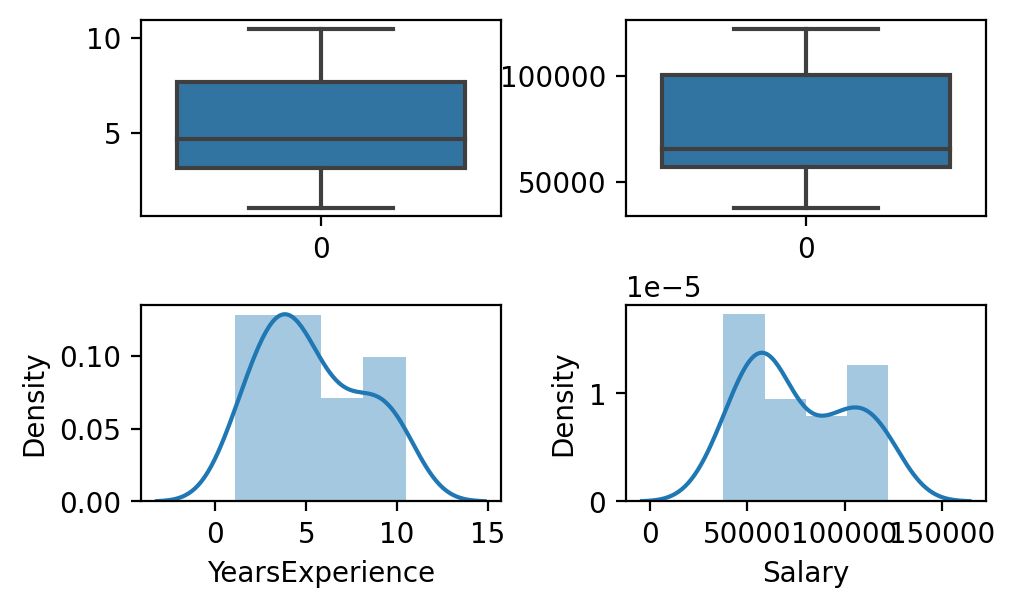

In [6]:
fig, ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['YearsExperience'], ax = ax[0,0])
sns.boxplot(df['Salary'], ax = ax[0,1])
sns.distplot(df['YearsExperience'], ax = ax[1,0])
sns.distplot(df['Salary'], ax = ax[1,1])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

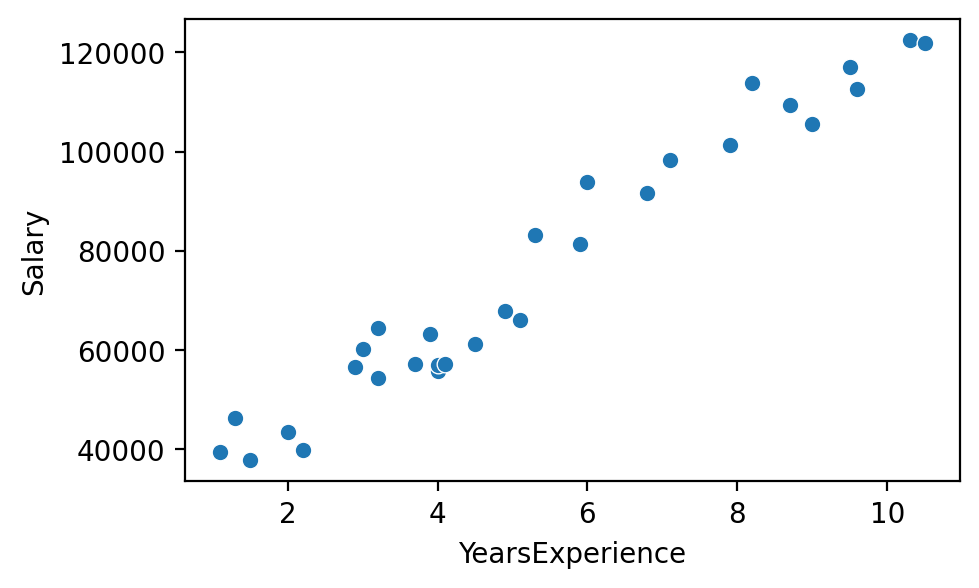

In [7]:
sns.scatterplot(data=df,x='YearsExperience',y='Salary')

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: >

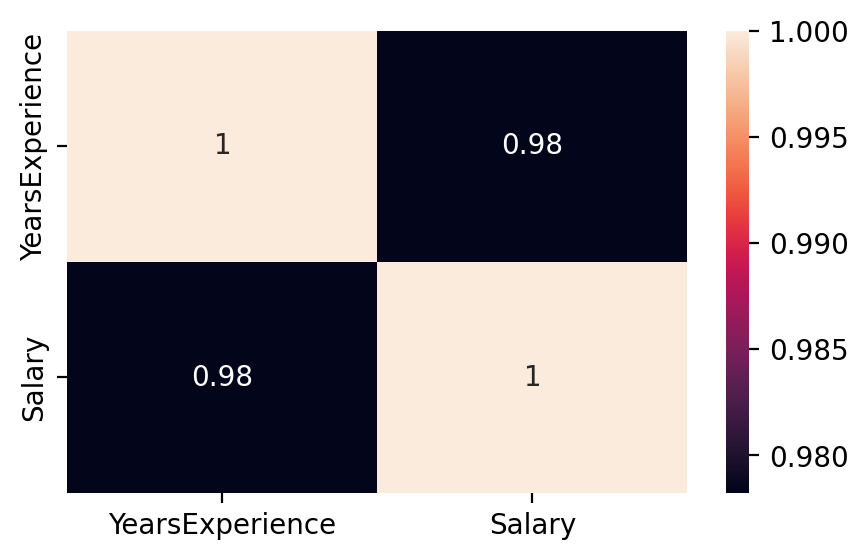

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df['YearsExperience'].skew()

0.37956024064804106

In [11]:
df['Salary'].skew()

0.35411967922959153

### Transforming The Data

#### Log Transformation

In [12]:
df['log_YearsExperience'] = np.log(df['YearsExperience'])
df['log_Salary'] = np.log(df['Salary'])

df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343,0.095310,10.580073
1,1.3,46205,0.262364,10.740843
2,1.5,37731,0.405465,10.538237
3,2.0,43525,0.693147,10.681091
4,2.2,39891,0.788457,10.593906


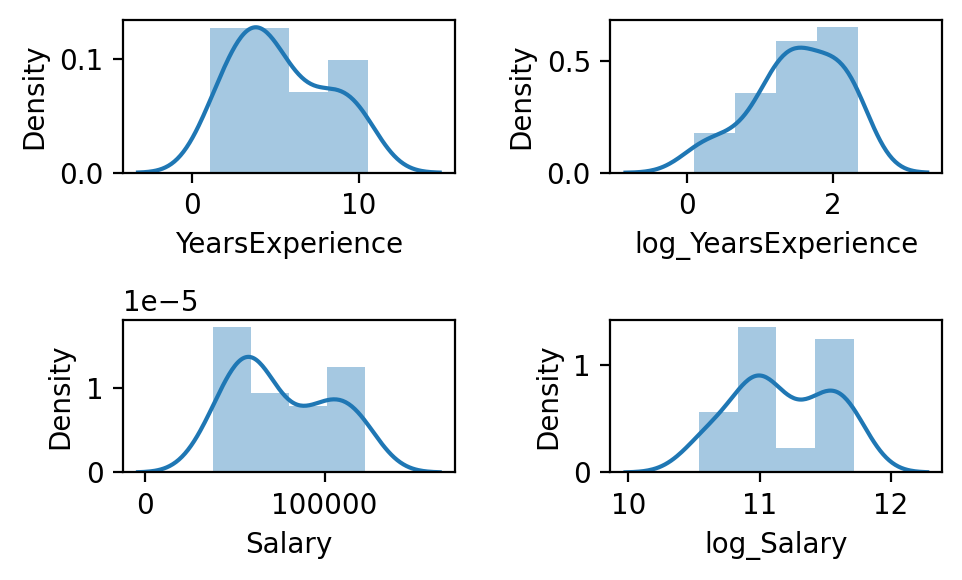

In [13]:
fig, ax = plt.subplots(2,2)

sns.distplot(df['YearsExperience'], ax = ax[0,0])
sns.distplot(df['log_YearsExperience'], ax = ax[0,1])
sns.distplot(df['Salary'], ax = ax[1,0])
sns.distplot(df['log_Salary'], ax = ax[1,1])
plt.tight_layout()

#### Sqrt Transformation

In [14]:
df['sqrt_YearsExperience'] = np.sqrt(df['YearsExperience'])
df['sqrt_Salary'] = np.sqrt(df['Salary'])

df.head()

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343,0.095310,10.580073,1.048809,198.350700
1,1.3,46205,0.262364,10.740843,1.140175,214.953483
2,1.5,37731,0.405465,10.538237,1.224745,194.244691
3,2.0,43525,0.693147,10.681091,1.414214,208.626460
4,2.2,39891,0.788457,10.593906,1.483240,199.727314


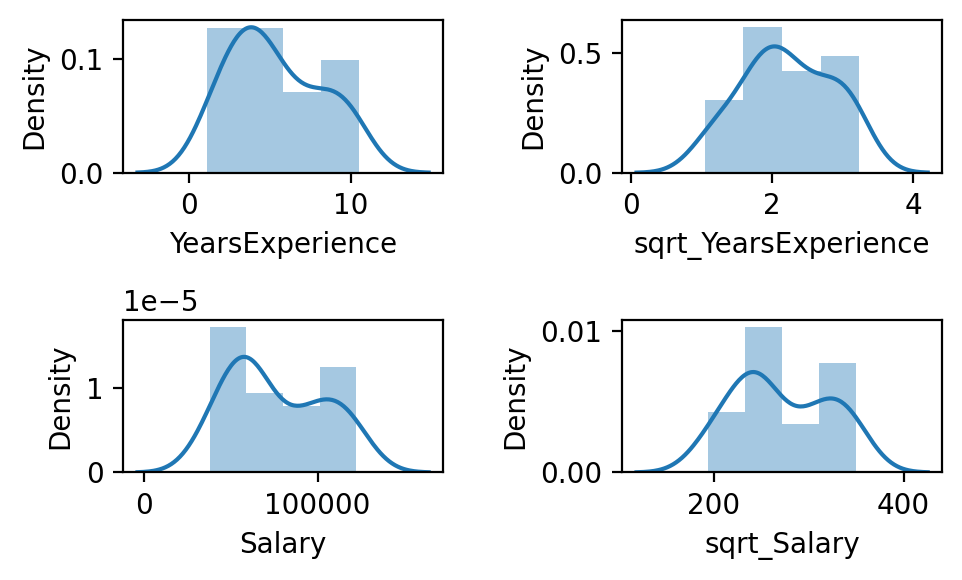

In [15]:
fig, ax = plt.subplots(2,2)

sns.distplot(df['YearsExperience'], ax = ax[0,0])
sns.distplot(df['sqrt_YearsExperience'], ax = ax[0,1])
sns.distplot(df['Salary'], ax = ax[1,0])
sns.distplot(df['sqrt_Salary'], ax = ax[1,1])
plt.tight_layout()

## Building Model From The Data

### Creating Model With Orignal Data

In [16]:
org_model = smf.ols('YearsExperience~Salary', data=df).fit()

In [17]:
print('\n T-Value of model wtin orignal value', '\n', org_model.tvalues)
print('\n P-Value of model wtin orignal value', '\n', org_model.pvalues)


 T-Value of model wtin orignal value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin orignal value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [18]:
org_model.rsquared

0.9569566641435086

### Creating Model With Sqrt Data

In [19]:
sqrt_model = smf.ols('sqrt_YearsExperience~sqrt_Salary', data=df).fit()

In [20]:
print('\n T-Value of model wtin Sqrt value', '\n', sqrt_model.tvalues)
print('\n P-Value of model wtin Sqrt value', '\n', sqrt_model.pvalues)


 T-Value of model wtin Sqrt value 
 Intercept      -7.208167
sqrt_Salary    21.315126
dtype: float64

 P-Value of model wtin Sqrt value 
 Intercept      7.599072e-08
sqrt_Salary    7.584326e-19
dtype: float64


In [21]:
sqrt_model.rsquared

0.9419490138976826

### Creating Model With Log Data

In [22]:
log_model = smf.ols('log_YearsExperience~log_Salary', data=df).fit()

In [23]:
print('\n T-Value of model wtin log value', '\n', org_model.tvalues)
print('\n P-Value of model wtin log value', '\n', org_model.pvalues)


 T-Value of model wtin log value 
 Intercept    -7.281283
Salary       24.950094
dtype: float64

 P-Value of model wtin log value 
 Intercept    6.300123e-08
Salary       1.143068e-20
dtype: float64


In [24]:
log_model.rsquared

0.9052150725817153